# Heart Attack Analysis & Prediction Dataset

**About this dataset**

* Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type

    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic

* trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results

    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* thalach : maximum heart rate achieved

* target : 0= less chance of heart attack 1= more chance of heart attack

## 1. Introduction

### 1.1 Import tools and Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_heart = pd.read_csv("heart.csv")
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_heart["target"] = df_heart["output"]

In [5]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [6]:
df_heart.drop(["output"],inplace=True ,axis=1)
df_heart.head().T

,0,1,2,3,4
age,63.0,37.0,41.0,56.0,57.0
sex,1.0,1.0,0.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0
trtbps,145.0,130.0,130.0,120.0,120.0
chol,233.0,250.0,204.0,236.0,354.0
fbs,1.0,0.0,0.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0
thalachh,150.0,187.0,172.0,178.0,163.0
exng,0.0,0.0,0.0,0.0,1.0
oldpeak,2.3,3.5,1.4,0.8,0.6


## 2. Data

### 2.1 Meeting Datas

Here we collect the information about dataset.

In [7]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
target      0
dtype: int64

**Notes:**
    
    * The whole datas integer or float so we don't need any converting process.
    * We have not any missing value. This is so nice because we do not need to any filling process.

In [10]:
df_heart.shape

(303, 14)

In [11]:
df_heart.duplicated().any()

True

In [12]:
df_heart.duplicated().sum()

1

We have 1 duplicate row. We need to drop one of them.

In [13]:
df_heart.drop_duplicates(keep="first", inplace=True)

In [14]:
df_heart.duplicated().sum()

0

In [15]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [16]:
# Unique values
unique_values=[]
for column in df_heart.columns:
    v_c=df_heart[column].value_counts().count()
    unique_values.append(v_c)
unique_values
pd.DataFrame(unique_values,index=df_heart.columns,columns=['total unique value in each column'])

,total unique value in each column
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [17]:
df_heart.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### 2.2 Data Visualization

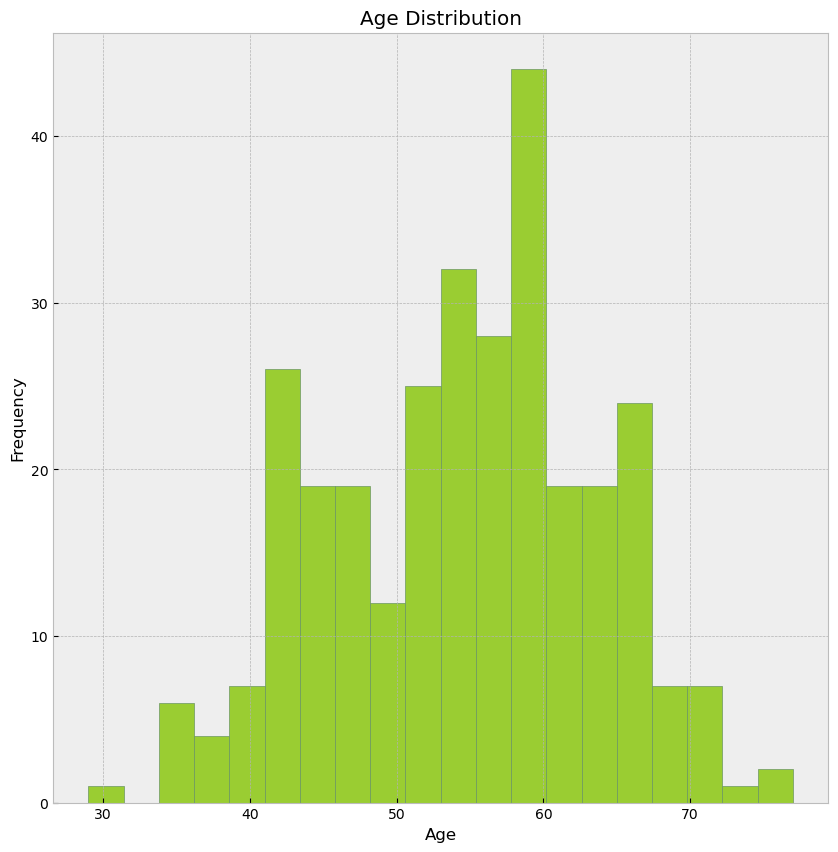

In [18]:
plt.style.use('bmh')
plt.figure(figsize=(10,10))
plt.hist(df_heart['age'], bins=20, color='yellowgreen' , edgecolor="#6A9662")
plt.gca().set(title='Age Distribution', xlabel='Age', ylabel='Frequency')
plt.show()

<AxesSubplot:ylabel='age'>

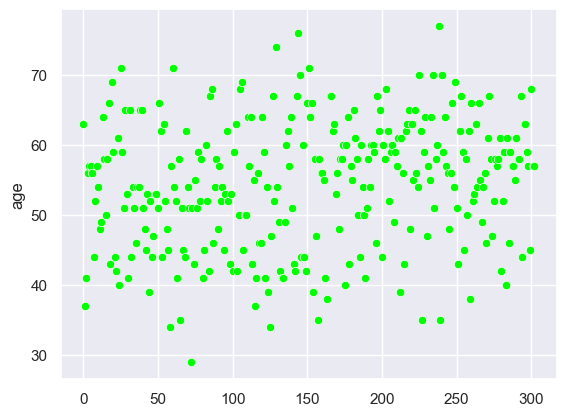

In [19]:
sns.set(style='darkgrid')
sns.scatterplot(data=df_heart['age'],color='lime')

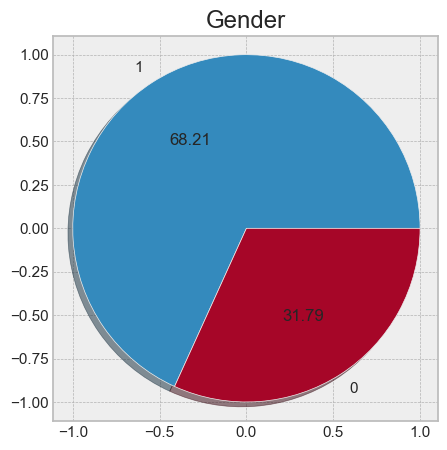

In [20]:
plt.style.use('bmh')
plt.figure(figsize=(5,5))
plt.pie(df_heart['sex'].value_counts(), labels=df_heart['sex'].value_counts().index,autopct='%.2f', shadow=True, frame=True )
plt.title('Gender')
plt.show()

# 3.Modelling

Use to different models and we choose the highest score using the prediction.

## 3.1 Choose the right estimator

<AxesSubplot:>

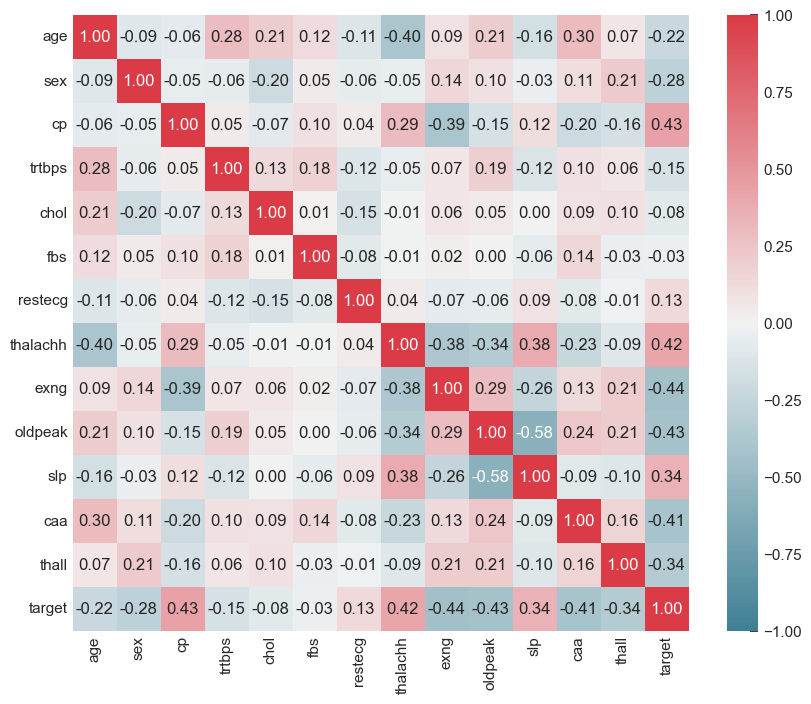

In [21]:
# Let's make our correlation matrix a little prettier

f, ax = plt.subplots(figsize=(10, 8))
corr = df_heart.corr()
sns.heatmap(corr,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            fmt=".2f",
            annot=True,
            vmin=-1.0, vmax=1.0,
            square=True, ax=ax)

**Notes:** As you can see fbs is not necessary more others features than but we compare all features our predictions

In [22]:
# Split the into train and test data
from sklearn.model_selection import train_test_split
x = df_heart.drop("target", axis=1)
y = df_heart["target"]

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((241, 13), (61, 13), (241,), (61,))

In [23]:
x_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2


In [24]:
x_test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [25]:
y_test.head()

180    0
229    0
111    1
247    0
60     1
Name: target, dtype: int64

In [26]:
# Import tools
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [27]:
models = {"LinearSVC": LinearSVC(dual=False),
          "RandomForestClassifier": RandomForestClassifier(),
          "KNeighborsClassifier": KNeighborsClassifier()}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    
    """
    We used the parameters fitting and score of models.
    """
    # Set the random seed
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        # Fit the model
        model.fit(x_train, y_train)
        # Calculate the model score
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

In [29]:
model_scores

{'LinearSVC': 0.819672131147541,
 'RandomForestClassifier': 0.8688524590163934,
 'KNeighborsClassifier': 0.6557377049180327}

<AxesSubplot:>

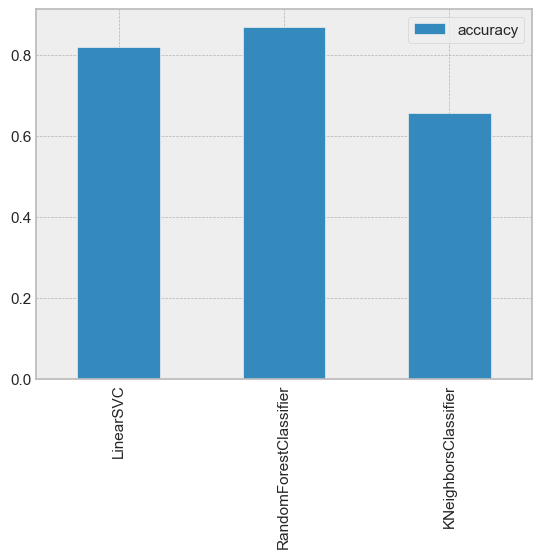

In [30]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

The highest score of model is RandomForestClassifier. We use the RandomForestClassifier for prediction.

In [48]:
np.random.seed(42)
model_2 = RandomForestClassifier()
model_2.fit(x_train, y_train)
model_2.score(x_test, y_test)

0.8688524590163934

We are fitting the model RandomForestClassfier estimator. We continue the this estimator. 

## 3.2 Improving model

Now we've got a baseline model... and we know a öodel's first predictions are not always what we should based our next steps off. 
What should do?

Let's look at following:
* Hyperparameters tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Are under the curve (AUC)

### Hyperparameters Tuning

We use the GridSearchCV for improving

In [31]:
from sklearn.model_selection import GridSearchCV

In [38]:
np.random.seed(42)
param_grid = {"n_estimators": [100,200,500],
             "min_samples_leaf": [1,3,5],
             "n_jobs": [None, -1]
             
                
}
gr_cf = GridSearchCV(RandomForestClassifier(),
                     param_grid = param_grid,
                     verbose=True
                    )
gr_cf.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 200, 500],
                         'n_jobs': [None, -1]})

In [39]:
gr_cf.best_params_

{'min_samples_leaf': 3, 'n_estimators': 100, 'n_jobs': None}

In [40]:
gr_cf.score(x_test, y_test)

0.8524590163934426

In [41]:
model_scores

{'LinearSVC': 0.819672131147541,
 'RandomForestClassifier': 0.8688524590163934,
 'KNeighborsClassifier': 0.6557377049180327}

We do not improved model score these hyperparameters. 

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report


... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [49]:
# Make predictions with tuned model
y_pred = model_2.predict(x_test)

In [50]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

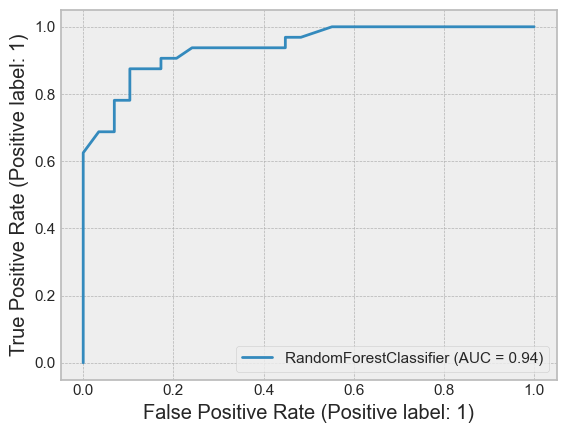

In [52]:
# Plot ROC curve and calculate and calculate AUC metric
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model_2, x_test, y_test)

In [56]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)

[[26  3]
 [ 5 27]]


In [57]:
# CLassification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<AxesSubplot:>

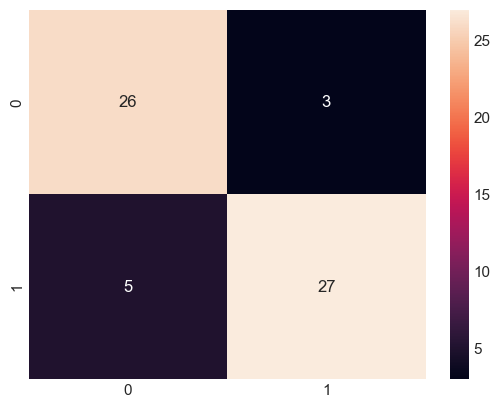

In [58]:
sns.heatmap(cf_matrix, annot=True)

In [59]:
y_test.shape

(61,)